In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread, mmwrite

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos', 'souporcell', 'souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos', 'souporcell', 'souporcell_nogenos', 'scavengers']

con_cols = ['C1', 'C2', 'I1', 'I2']

In [3]:
gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t',
                  header=0, index_col=0)
atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t',
                   header=0, index_col=0)
gex.shape, atac.shape

((30497, 9), (30497, 9))

In [4]:
gex.head()

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,demuxalot,scsplit,scsplit_nogenos
AAACAGCCAAGGTATA-1_20220928-IGVF-D0,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,48_V3,27_C4
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4
AAACAGCCAGCAAATA-1_20220928-IGVF-D0,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,48_V3,27_C4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4


In [5]:
cov = 20
indir = f'{projdir}/csv/var_consistency/real/gex/merged/'

gex_con = pd.DataFrame(index=gex_methods, columns=con_cols)
method = 'vireo'
tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
                      header=0, index_col=0)
tmp_con

,C1,C2,I1,I2,donor
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,69,876,17,1,25_A4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,30,814,32,1,25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0,21,411,17,3,25_A4
AAACATGCAATCGCAC-1_20220928-IGVF-D0,31,656,17,1,25_A4
AAACATGCAGGGAGGA-1_20220928-IGVF-D0,25,553,17,4,25_A4
...,...,...,...,...,...
TTTGTGAAGACAACGA-1_20220928-IGVF-D3,3,193,8,0,48_V3
TTTGTGAAGGACGTAA-1_20220928-IGVF-D3,3,189,9,2,48_V3
TTTGTGTTCAGGAAGC-1_20220928-IGVF-D3,5,189,11,0,48_V3
TTTGTGTTCTTCAATC-1_20220928-IGVF-D3,11,345,8,2,48_V3


In [6]:
def process_con(con):
    con['DP'] = np.sum(con.iloc[:,:4], axis=1)
    con['Consistent rate'] = (con['C1'] + con['C2']) / con['DP']
    con['Inconsistent rate'] = 1 - con['Consistent rate']
    con['C1 rate'] = con['C1'] / con['DP']
    con['C2 rate'] = con['C2'] / con['DP']
    con['I1 rate'] = con['I1'] / con['DP']
    con['I2 rate'] = con['I2'] / con['DP']
    return con

In [7]:
tmp_con = process_con(tmp_con)

In [8]:
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
melt_con = tmp_con.melt(id_vars='donor', value_vars=melt_cols)
melt_con

,donor,variable,value
0,25_A4,C1 rate,0.071651
1,25_A4,C1 rate,0.034208
2,25_A4,C1 rate,0.046460
3,25_A4,C1 rate,0.043972
4,25_A4,C1 rate,0.041736
...,...,...,...
88667,48_V3,I2 rate,0.000000
88668,48_V3,I2 rate,0.009852
88669,48_V3,I2 rate,0.000000
88670,48_V3,I2 rate,0.005464


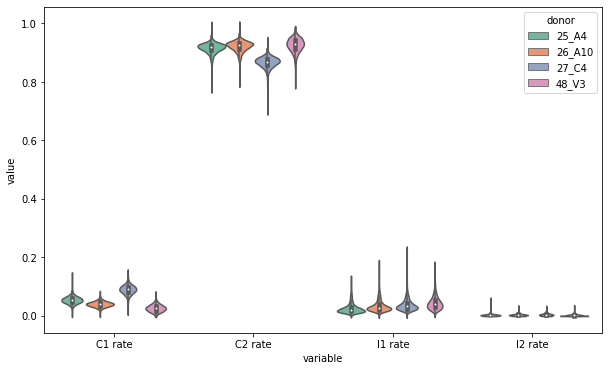

In [9]:
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')

ax = sns.violinplot(melt_con, x='variable', y='value', hue='donor')
ax.grid(False)

In [10]:
len(gex_methods)

9

demuxlet
freemuxlet
vireo
vireo_nogenos
scsplit
scsplit_nogenos
souporcell
souporcell_nogenos
demuxalot


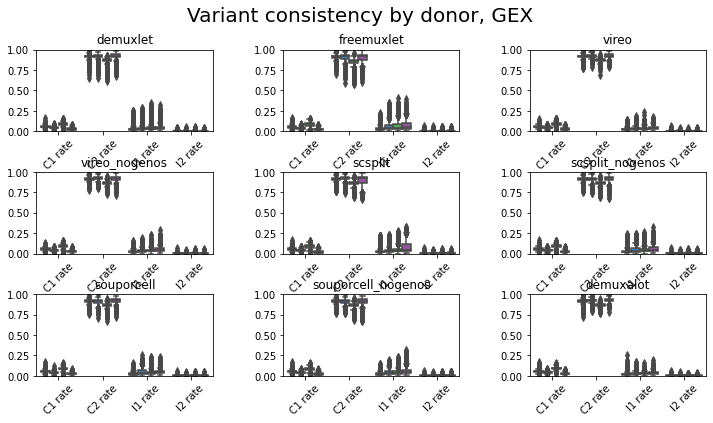

In [26]:
### plot for all figures

fig, axes = plt.subplots(3, 3, figsize=(12, 6))
cov = 20
indir = f'{projdir}/csv/var_consistency/real/gex/merged'
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']

merged_gex_con = pd.DataFrame()

gex_con = pd.DataFrame(index=gex_methods, columns=con_cols)
for i, ax in enumerate(axes.flatten()):
    if i < 10:
        method = gex_methods[i]
        print(method)
        tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
                              header=0, index_col=0)
        tmp_con = process_con(tmp_con)
        melt_con = tmp_con.melt(id_vars='donor', value_vars=melt_cols)
        sns.boxplot(melt_con, x='variable', y='value', hue='donor', ax=ax)
        
        melt_con['method'] = method
        merged_gex_con = pd.concat([merged_gex_con, melt_con])

        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.legend_.remove()
        ax.set_ylim(0, 1)
        ax.set_title(f'{method}', fontsize=12)
        ax.grid(False)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        ax.remove()
        
plt.suptitle('Variant consistency by donor, GEX', fontsize=20)
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Adjust the value as needed
    

demuxlet
freemuxlet
vireo
vireo_nogenos
scsplit
scsplit_nogenos
souporcell
souporcell_nogenos
scavengers


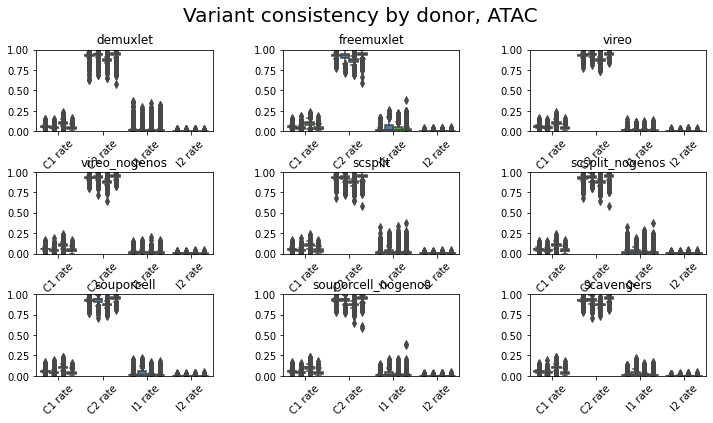

In [27]:
### plot for all figures

fig, axes = plt.subplots(3, 3, figsize=(12, 6))
cov = 20
indir = f'{projdir}/csv/var_consistency/real/atac/merged'
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
sns.set_palette('Set1')

merged_atac_con = pd.DataFrame()

atac_con = pd.DataFrame(index=atac_methods, columns=con_cols)
for i, ax in enumerate(axes.flatten()):
    if i < 10:
        method = atac_methods[i]
        print(method)
        tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
                              header=0, index_col=0)
        tmp_con = process_con(tmp_con)
        melt_con = tmp_con.melt(id_vars='donor', value_vars=melt_cols)
        sns.boxplot(melt_con, x='variable', y='value', hue='donor', ax=ax)
        melt_con['method'] = method
        merged_atac_con = pd.concat([merged_atac_con, melt_con])
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.legend_.remove()
        ax.set_ylim(0, 1)
        ax.set_title(f'{method}', fontsize=12)
        ax.grid(False)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        ax.remove()

plt.suptitle('Variant consistency by donor, ATAC', fontsize=20)
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Adjust the value as needed

In [30]:
merged_gex_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_s12_varcon_donors_gex.csv',
                       sep='\t', header=True, index=True)
merged_atac_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_s12_varcon_donors_atac.csv',
                       sep='\t', header=True, index=True)

In [31]:
# cov = 20
# indir = f'{projdir}/csv/var_consistency/real/gex/merged/'

# gex_con = pd.DataFrame(index=gex_methods, columns=con_cols)
# for method in gex_methods:
#     print(method)
#     tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
#                           header=0, index_col=0).drop(columns=['donor'])
#     gex_con.loc[method] = np.sum(tmp_con, axis=0)
    
# gex_con['DP'] = np.sum(gex_con, axis=1)
# gex_con['CON_RATE'] = (gex_con['C1'] + gex_con['C2']) / gex_con['DP']
# gex_con['INCON_RATE'] = 1 - gex_con['CON_RATE']
# gex_con['C1_RATE'] = gex_con['C1'] / gex_con['DP']
# gex_con['C2_RATE'] = gex_con['C2'] / gex_con['DP']
# gex_con['I1_RATE'] = gex_con['I1'] / gex_con['DP']
# gex_con['I2_RATE'] = gex_con['I2'] / gex_con['DP']

demuxlet
freemuxlet
vireo
vireo_nogenos
scsplit
scsplit_nogenos
souporcell
souporcell_nogenos
demuxalot


In [33]:
# cov = 20
# indir = f'{projdir}/csv/var_consistency/real/atac/merged/'

# atac_con = pd.DataFrame(index=atac_methods, columns=con_cols)
# for method in atac_methods:
#     print(method)
#     tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
#                           header=0, index_col=0).drop(columns=['donor'])
#     atac_con.loc[method] = np.sum(tmp_con, axis=0)
    
# atac_con['DP'] = np.sum(atac_con, axis=1)
# atac_con['CON_RATE'] = (atac_con['C1'] + atac_con['C2']) / atac_con['DP']
# atac_con['INCON_RATE'] = 1 - atac_con['CON_RATE']
# atac_con['C1_RATE'] = atac_con['C1'] / atac_con['DP']
# atac_con['C2_RATE'] = atac_con['C2'] / atac_con['DP']
# atac_con['I1_RATE'] = atac_con['I1'] / atac_con['DP']
# atac_con['I2_RATE'] = atac_con['I2'] / atac_con['DP']

In [36]:
# gex_con

In [37]:
# atac_con

In [38]:
# gex_con.to_csv(f'{projdir}/)